***Flight Data Analysis with Visualizations and Advanced Coding***

***Imports***

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# For better plots
sns.set(style="whitegrid")
%matplotlib inline

**Load Dataset**

In [43]:
# Load the dataset
df = pd.read_excel("D://Data_Train.xlsx")

# Preview
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


**Data Cleaning***

In [44]:
# Drop rows with nulls
df.dropna(inplace=True)

# Extract Day and Month from Journey Date
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day_name()
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month_name()

# Convert Duration to minutes
def convert_to_minutes(duration):
    h, m = 0, 0
    if 'h' in duration:
        h = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1]
    if 'm' in duration:
        m = int(duration.split('m')[0].strip())
    return h * 60 + m

df['Duration_mins'] = df['Duration'].apply(convert_to_minutes)


**1. Number of Flights by Stoppages***

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\4084267635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Total_Stops', palette='Set2')


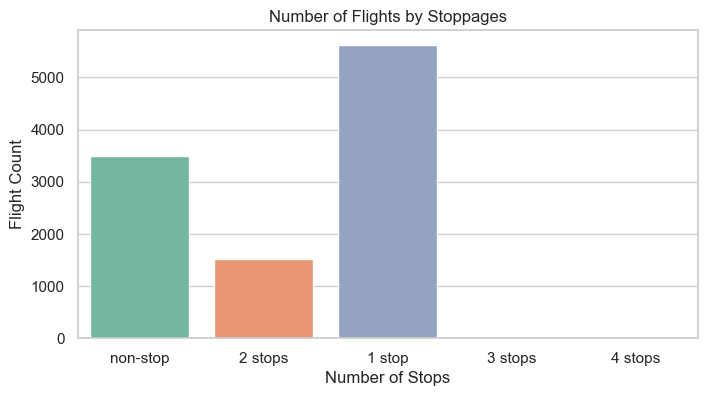

In [47]:
stoppage_counts = df['Total_Stops'].value_counts()
print(stoppage_counts)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Total_Stops', palette='Set2')
plt.title("Number of Flights by Stoppages")
plt.xlabel("Number of Stops")
plt.ylabel("Flight Count")
plt.show()

***2. Most Expensive and Cheapest Flights***

In [53]:
cheapest = df[df['Price'] == df['Price'].min()]
most_expensive = df[df['Price'] == df['Price'].max()]

print("Cheapest Flight:\n", cheapest[['Airline', 'Source', 'Destination', 'Total_Stops', 'Price']])
print("\nMost Expensive Flight:\n", most_expensive[['Airline', 'Source', 'Destination', 'Total_Stops', 'Price']])

Cheapest Flight:
         Airline  Source Destination Total_Stops   Price
4066   SpiceJet  Mumbai   Hyderabad    non-stop  1759.0
4274   SpiceJet  Mumbai   Hyderabad    non-stop  1759.0
4839   SpiceJet  Mumbai   Hyderabad    non-stop  1759.0
10567  SpiceJet  Mumbai   Hyderabad    non-stop  1759.0

Most Expensive Flight:
                    Airline    Source Destination Total_Stops    Price
2924  Jet Airways Business  Banglore   New Delhi      1 stop  79512.0


***3. Variation of Flight Prices by Source***

           count          mean          std     min     25%      50%      75%  \
Source                                                                          
Banglore  2197.0   8017.464269  5964.303079  3257.0  4544.0   6121.0   8714.0   
Chennai    381.0   4789.892388  2190.219021  3145.0  3597.0   3850.0   5277.0   
Delhi     4536.0  10540.113536  3782.092549  3876.0  7202.0  10262.0  13344.0   
Kolkata   2871.0   9158.389411  3741.997070  3480.0  5192.0   9345.0  12681.0   
Mumbai     697.0   5059.708752  4100.504092  1759.0  2647.0   3342.0   5678.0   

              max  
Source             
Banglore  79512.0  
Chennai   19630.0  
Delhi     52285.0  
Kolkata   31945.0  
Mumbai    25139.0  


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\3586748718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Source', y='Price', palette='coolwarm')


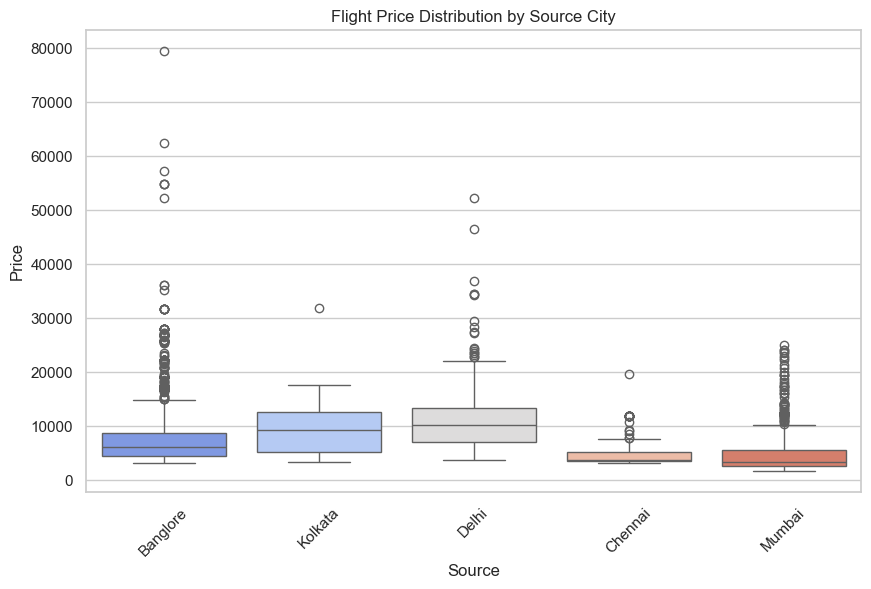

In [55]:
summary_by_source = df.groupby('Source')['Price'].describe(percentiles=[.25, .5, .75])
print(summary_by_source)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Source', y='Price', palette='coolwarm')
plt.title("Flight Price Distribution by Source City")
plt.xticks(rotation=45)
plt.show()


⃣***4 Extract Journey Day & Month***

Journey_day
Wednesday    2079
Monday       1849
Thursday     1832
Saturday     1670
Sunday       1474
Friday        909
Tuesday       869
Name: count, dtype: int64
Journey_month
May      3465
June     3414
March    2724
April    1079
Name: count, dtype: int64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\722541139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Journey_day', order=[
C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\722541139.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Journey_month', ax=axes[1], palette='Spectral')


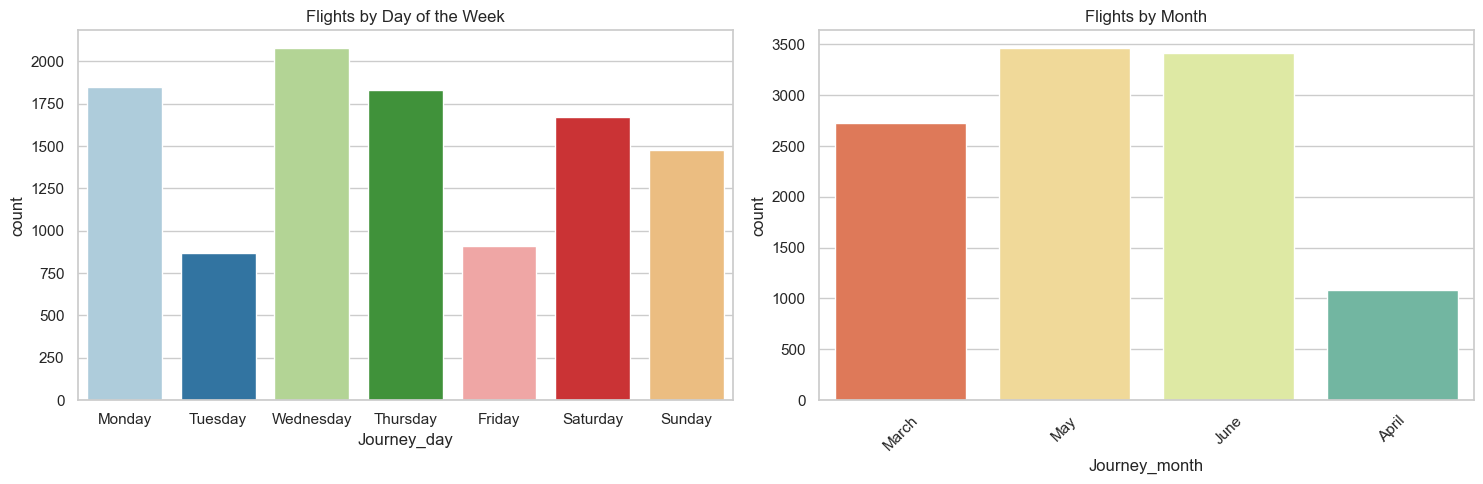

In [57]:
# Flight counts by Day of Week and Month
print(df['Journey_day'].value_counts())
print(df['Journey_month'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='Journey_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0], palette='Paired')
axes[0].set_title("Flights by Day of the Week")

sns.countplot(data=df, x='Journey_month', ax=axes[1], palette='Spectral')
axes[1].set_title("Flights by Month")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

️***5. Day & Month with Max Stoppages (1 or more)***

Journey_day
Wednesday    1531
Thursday     1386
Monday       1230
Saturday     1108
Sunday        954
Tuesday       580
Friday        402
Name: count, dtype: int64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\3187481260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multi_stop, x='Journey_day', order=[


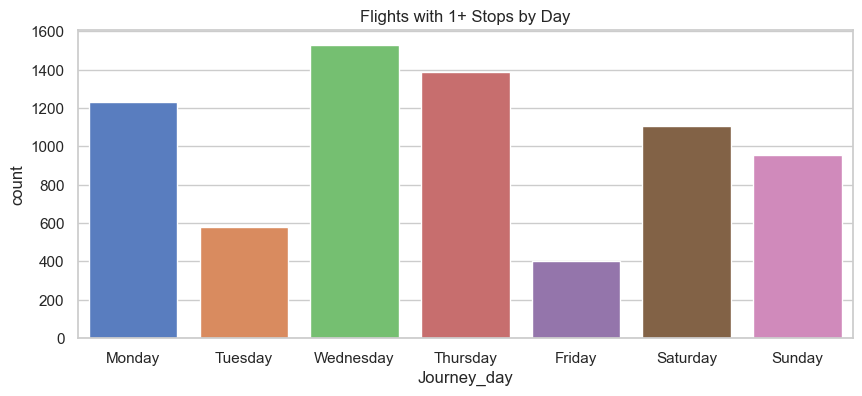

C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\3187481260.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multi_stop, x='Journey_month', palette='muted')


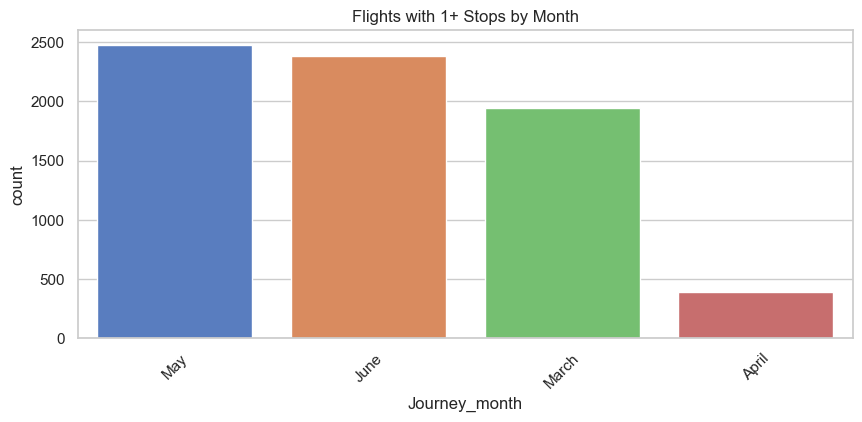

In [59]:
multi_stop = df[df['Total_Stops'] != 'non-stop']
print(multi_stop['Journey_day'].value_counts())
plt.figure(figsize=(10, 4))
sns.countplot(data=multi_stop, x='Journey_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='muted')
plt.title("Flights with 1+ Stops by Day")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=multi_stop, x='Journey_month', palette='muted')
plt.title("Flights with 1+ Stops by Month")
plt.xticks(rotation=45)
plt.show()

***6. Flight Availability by Source and Destination***

     Source Destination  Num_Flights
3     Delhi      Cochin         4536
4   Kolkata    Banglore         2871
0  Banglore       Delhi         1265
1  Banglore   New Delhi          932
5    Mumbai   Hyderabad          697
2   Chennai     Kolkata          381


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\4219974070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Num_Flights', y=top_routes['Source'] + ' → ' + top_routes['Destination'], palette='Blues_d')


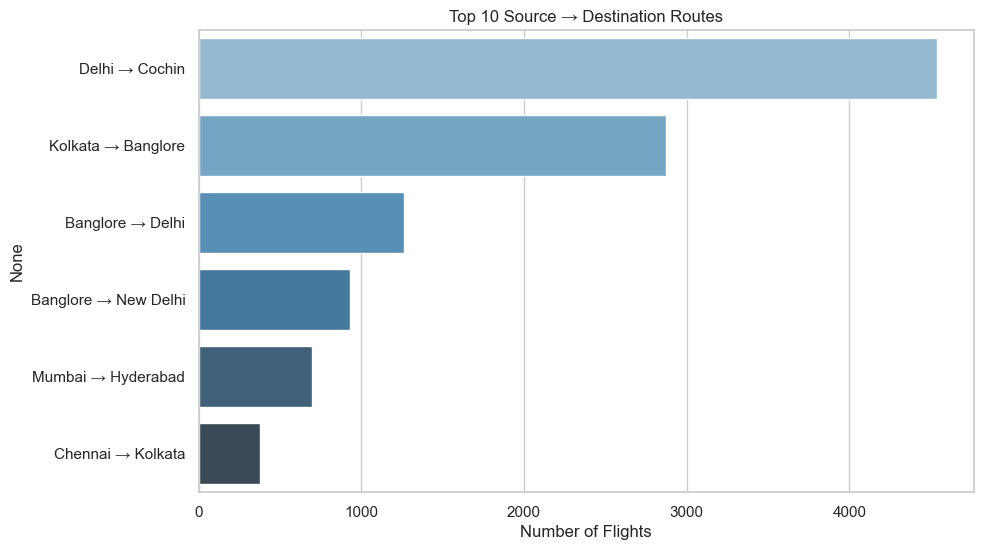

In [61]:
route_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Num_Flights')
top_routes = route_counts.sort_values(by='Num_Flights', ascending=False).head(10)
print(top_routes)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x='Num_Flights', y=top_routes['Source'] + ' → ' + top_routes['Destination'], palette='Blues_d')
plt.title("Top 10 Source → Destination Routes")
plt.xlabel("Number of Flights")
plt.show()

***7.Average Price by Airline***

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\4008951300.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_avg_price.values, y=airline_avg_price.index, palette='viridis')


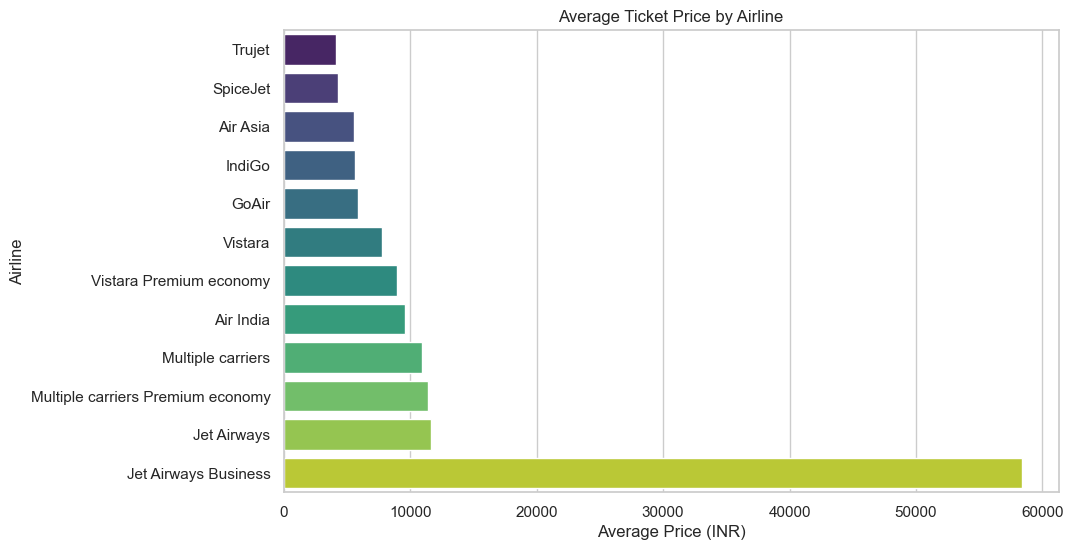

In [67]:
airline_avg_price = df.groupby('Airline')['Price'].mean().sort_values()
print(airline_avg_price)

airline_avg_price = df.groupby('Airline')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=airline_avg_price.values, y=airline_avg_price.index, palette='viridis')
plt.title("Average Ticket Price by Airline")
plt.xlabel("Average Price (INR)")
plt.show()


***8.Flight Duration vs. Price***

Correlation between duration and price: 0.51


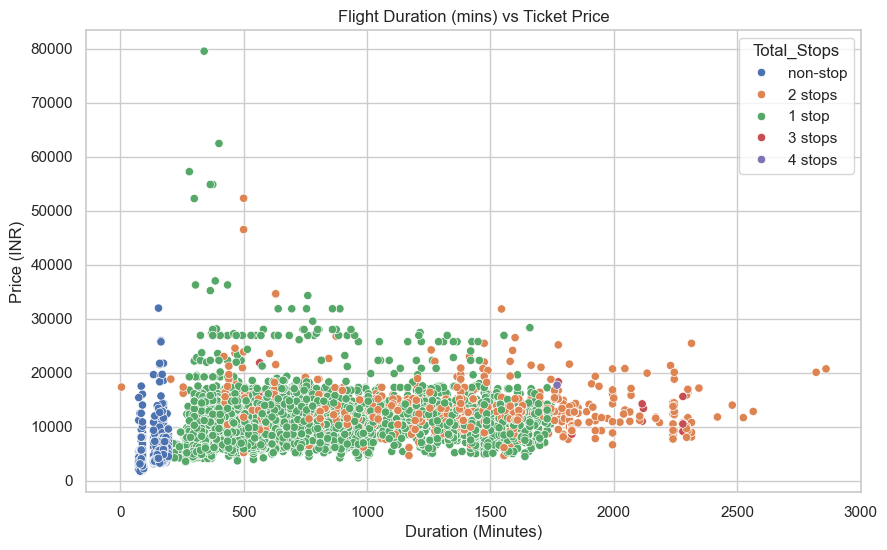

Correlation between Duration and Price: 0.51


In [65]:
correlation = df['Duration_mins'].corr(df['Price'])
print(f"Correlation between duration and price: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration_mins', y='Price', hue='Total_Stops', palette='deep')
plt.title("Flight Duration (mins) vs Ticket Price")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Price (INR)")
plt.show()

correlation = df['Duration_mins'].corr(df['Price'])
print(f"Correlation between Duration and Price: {correlation:.2f}")


***9. TOP 5 Most Popular Routes***

Route
Delhi → Cochin          4536
Kolkata → Banglore      2871
Banglore → Delhi        1265
Banglore → New Delhi     932
Mumbai → Hyderabad       697
Name: count, dtype: int64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\3888151524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='cool')


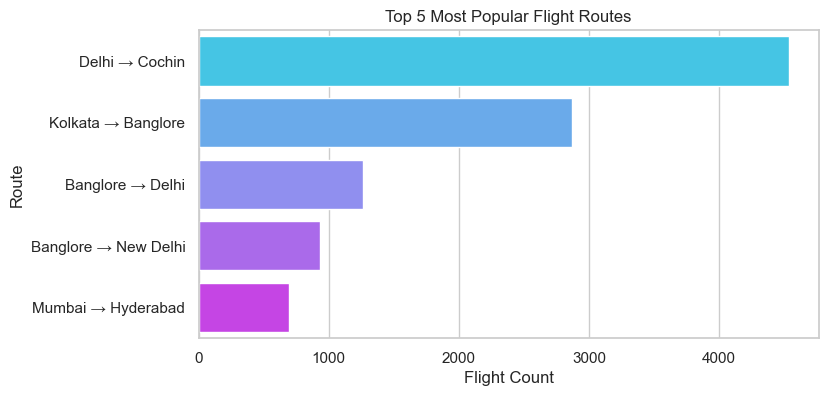

In [69]:
df['Route'] = df['Source'] + ' → ' + df['Destination']
top_routes = df['Route'].value_counts().head(5)
print(top_routes)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='cool')
plt.title("Top 5 Most Popular Flight Routes")
plt.xlabel("Flight Count")
plt.show()


***10. Impact of Additional Info***

Additional_Info
No check-in baggage included     3645.156250
No Info                          8044.666667
No info                          9141.519295
In-flight meal not included      9471.834511
Red-eye flight                  10873.000000
Change airports                 16800.714286
1 Long layover                  22109.631579
2 Long layover                  26480.000000
1 Short layover                 26743.000000
Business class                  56811.250000
Name: Price, dtype: float64


C:\Users\VIRUS\AppData\Local\Temp\ipykernel_6864\2797690856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=additional_info_prices.values, y=additional_info_prices.index, palette='cubehelix')


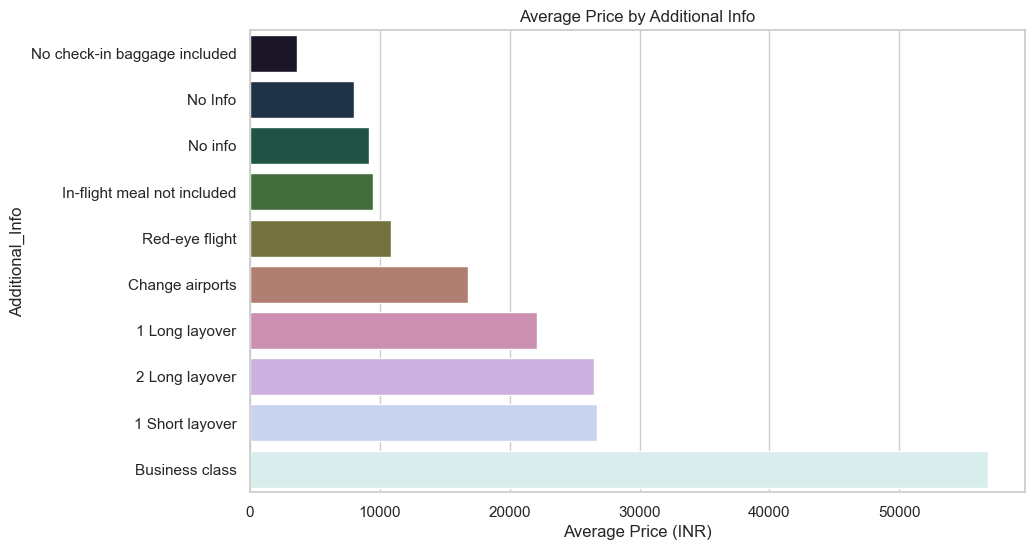

In [73]:
additional_info_prices = df.groupby('Additional_Info')['Price'].mean().sort_values()
print(additional_info_prices)
plt.figure(figsize=(10, 6))
sns.barplot(x=additional_info_prices.values, y=additional_info_prices.index, palette='cubehelix')
plt.title("Average Price by Additional Info")
plt.xlabel("Average Price (INR)")
plt.show()


***11. Interesting Fact***

In [77]:
# Cheapest non-stop flight
nonstop_cheapest = df[(df['Total_Stops'] == 'non-stop') & (df['Price'] == df[df['Total_Stops'] == 'non-stop']['Price'].min())]
print("Interesting fact - Cheapest Non-Stop Flight:\n", nonstop_cheapest[['Airline', 'Source', 'Destination', 'Price']])

Interesting fact - Cheapest Non-Stop Flight:
         Airline  Source Destination   Price
4066   SpiceJet  Mumbai   Hyderabad  1759.0
4274   SpiceJet  Mumbai   Hyderabad  1759.0
4839   SpiceJet  Mumbai   Hyderabad  1759.0
10567  SpiceJet  Mumbai   Hyderabad  1759.0


***ADVANCE PYTHON CODE***

***1. Outlier Detection in Prices (using IQR)***

Number of outlier-priced flights: 94


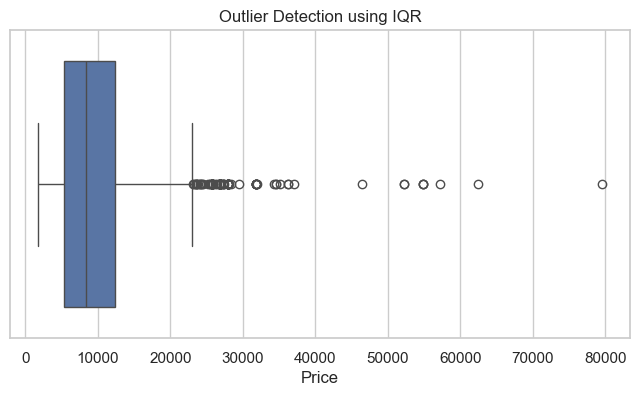

In [79]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]

print(f"Number of outlier-priced flights: {outliers.shape[0]}")

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title("Outlier Detection using IQR")
plt.show()


***2. Top Airlines Operating in Each City Pair***


In [81]:
top_airlines_by_route = df.groupby(['Source', 'Destination'])['Airline'].agg(lambda x: x.value_counts().index[0])
top_airlines_by_route = top_airlines_by_route.reset_index().rename(columns={'Airline': 'Top_Airline'})
print(top_airlines_by_route.head(10))


     Source Destination  Top_Airline
0  Banglore       Delhi  Jet Airways
1  Banglore   New Delhi  Jet Airways
2   Chennai     Kolkata       IndiGo
3     Delhi      Cochin  Jet Airways
4   Kolkata    Banglore  Jet Airways
5    Mumbai   Hyderabad  Jet Airways


***3. Compare Flight Prices on Weekdays vs Weekends***

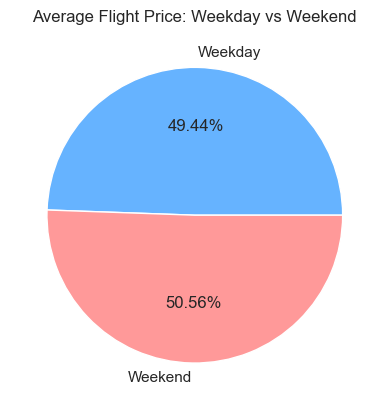

In [83]:
df['Weekend'] = df['Journey_day'].isin(['Saturday', 'Sunday'])

weekend_avg = df.groupby('Weekend')['Price'].mean()
labels = ['Weekday', 'Weekend']
plt.pie(weekend_avg, labels=labels, autopct='%.2f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Average Flight Price: Weekday vs Weekend")
plt.show()


***4. Flight Duration Distribution per Airline***

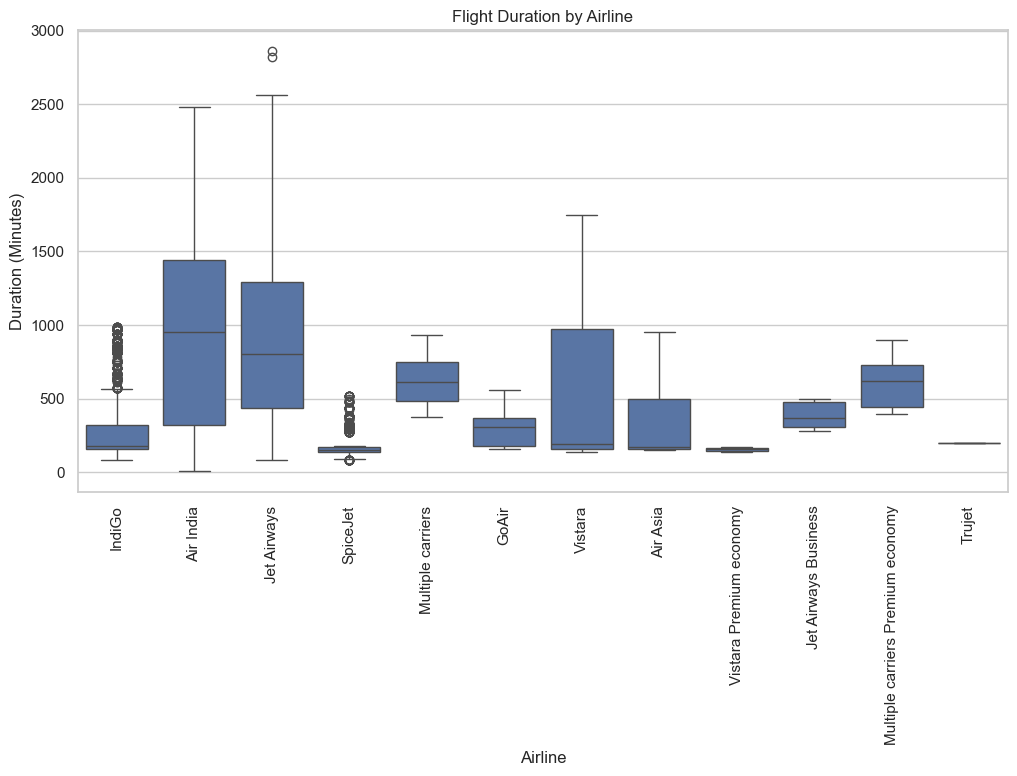

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Duration_mins')
plt.xticks(rotation=90)
plt.title("Flight Duration by Airline")
plt.ylabel("Duration (Minutes)")
plt.show()

***5. Word Frequency in Additional_Info***

In [96]:
from collections import Counter
all_words = ' '.join(df['Additional_Info']).split()
word_freq = Counter(all_words)
print("Top 10 keywords in 'Additional_Info':", word_freq.most_common(10))

Top 10 keywords in 'Additional_Info': [('No', 8667), ('info', 8344), ('included', 2302), ('In-flight', 1982), ('meal', 1982), ('not', 1982), ('check-in', 320), ('baggage', 320), ('layover', 21), ('1', 20)]


***6. Price Trends Over Journey Days***

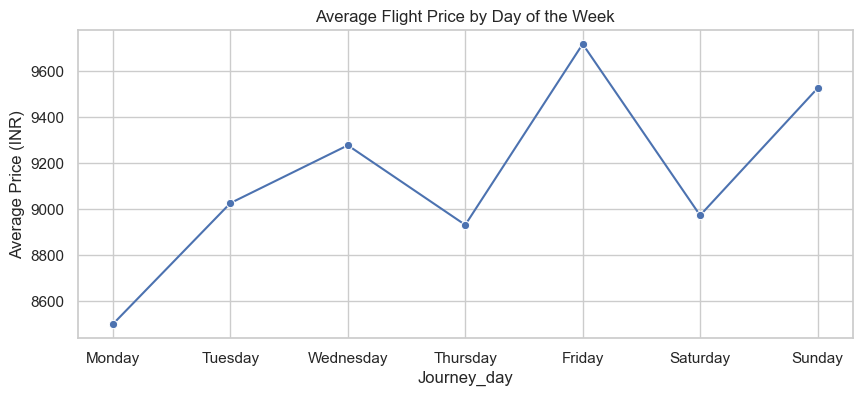

In [87]:
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_by_day = df.groupby('Journey_day')['Price'].mean().reindex(order_days)

plt.figure(figsize=(10, 4))
sns.lineplot(x=price_by_day.index, y=price_by_day.values, marker='o')
plt.title("Average Flight Price by Day of the Week")
plt.ylabel("Average Price (INR)")
plt.show()

***7. Heatmap of Average Price per Source-Destination***

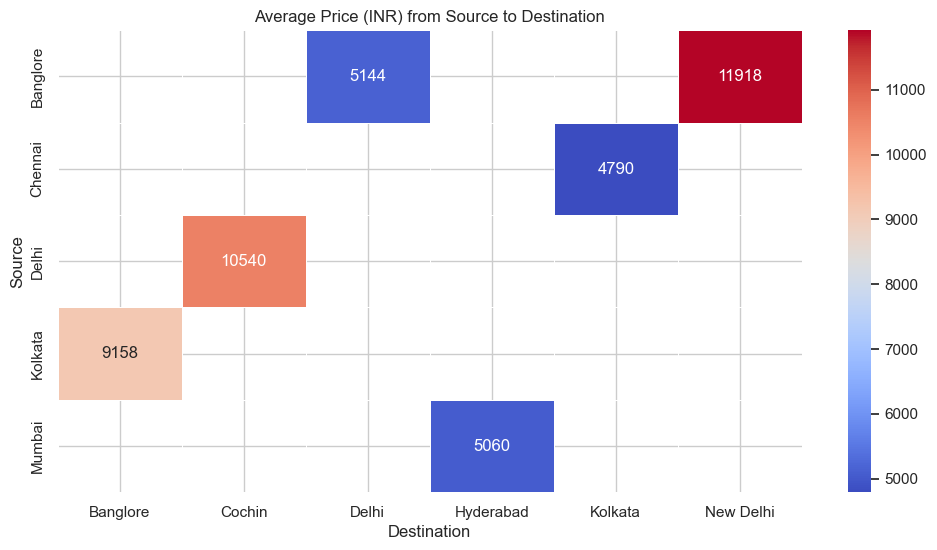

In [89]:
pivot_price = df.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_price, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Price (INR) from Source to Destination")
plt.show()

***8. Flight Price Prediction with Linear Regression (Basic Model)***

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Encode stops
df['Stops_encoded'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Feature set
features = df[['Duration_mins', 'Stops_encoded']]
target = df['Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Linear Regression Model R^2 Score: {score:.2f}")

Linear Regression Model R^2 Score: 0.36


In [ ]:
---------------xxxxxxxxxxxxxx---------------------